In [1]:
!pip install pystan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.5 MB/s eta 0:00:00


In [2]:
import prophet

In [3]:
dir(prophet)

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'here',
 'make_holidays',
 'models',
 'plot']

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/content/HDFCBANK.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-03,1015.224976,1026.099976,1003.500000,1015.575012,979.958069,7666074
1,2018-10-04,1004.000000,1008.900024,971.500000,978.875000,944.545105,8985292
2,2018-10-05,976.974976,995.000000,970.075012,982.650024,948.187744,7864590
3,2018-10-08,982.500000,984.500000,965.000000,972.500000,938.393799,10064010
4,2018-10-09,972.200012,982.500000,965.000000,970.299988,936.270813,6229682


In [6]:
df.shape

(1235, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1235 non-null   datetime64[ns]
 1   Open       1235 non-null   float64       
 2   High       1235 non-null   float64       
 3   Low        1235 non-null   float64       
 4   Close      1235 non-null   float64       
 5   Adj Close  1235 non-null   float64       
 6   Volume     1235 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.7 KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df['Date'].min()

Timestamp('2018-10-03 00:00:00')

In [11]:
df['Date'].max()

Timestamp('2023-09-29 00:00:00')

In [12]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [15]:
dataset = df[['Date', 'Close']]

In [16]:
dataset.head()

,Date,Close
0,2018-10-03,1015.575012
1,2018-10-04,978.875000
2,2018-10-05,982.650024
3,2018-10-08,972.500000
4,2018-10-09,970.299988


In [17]:
dataset['Date'].nunique()

1235

In [18]:
len(dataset)

1235

In [19]:
df_prophet = dataset.rename(columns={'Date':'ds', 'Close':'y'})
df_prophet

,ds,y
0,2018-10-03,1015.575012
1,2018-10-04,978.875000
2,2018-10-05,982.650024
3,2018-10-08,972.500000
4,2018-10-09,970.299988
...,...,...
1230,2023-09-25,1531.000000
1231,2023-09-26,1537.650024
1232,2023-09-27,1526.849976
1233,2023-09-28,1523.699951


In [20]:
from prophet import Prophet

In [21]:
m = Prophet()
model = m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp22xpi23o/m1fs9li2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp22xpi23o/0n4xu671.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11530', 'data', 'file=/tmp/tmp22xpi23o/m1fs9li2.json', 'init=/tmp/tmp22xpi23o/0n4xu671.json', 'output', 'file=/tmp/tmp22xpi23o/prophet_model10ec_g4h/prophet_model-20231003161620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:16:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:16:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [23]:
# Building Time Series Forecasting Model by using FB Prophet model
# we are predicting 6 months data

future_data = model.make_future_dataframe(periods = 180, freq='D')

In [24]:
future_data

,ds
0,2018-10-03
1,2018-10-04
2,2018-10-05
3,2018-10-08
4,2018-10-09
...,...
1410,2024-03-23
1411,2024-03-24
1412,2024-03-25
1413,2024-03-26


In [25]:
df_prophet.shape

(1235, 2)

In [26]:
future_data.shape

(1415, 1)

In [27]:
prediction = model.predict(future_data)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-10-03,924.032222,822.185957,966.667336,924.032222,924.032222,-32.436422,-32.436422,-32.436422,-3.520986,-3.520986,-3.520986,-28.915436,-28.915436,-28.915436,0.0,0.0,0.0,891.595799
1,2018-10-04,925.061364,823.845405,966.413584,925.061364,925.061364,-31.605101,-31.605101,-31.605101,-6.368382,-6.368382,-6.368382,-25.236719,-25.236719,-25.236719,0.0,0.0,0.0,893.456263
2,2018-10-05,926.090506,829.521366,968.723984,926.090506,926.090506,-28.806303,-28.806303,-28.806303,-7.324367,-7.324367,-7.324367,-21.481935,-21.481935,-21.481935,0.0,0.0,0.0,897.284203
3,2018-10-08,929.177932,844.555639,976.489077,929.177932,929.177932,-17.429042,-17.429042,-17.429042,-7.265491,-7.265491,-7.265491,-10.163550,-10.163550,-10.163550,0.0,0.0,0.0,911.748891
4,2018-10-09,930.207074,849.465540,993.919441,930.207074,930.207074,-10.609623,-10.609623,-10.609623,-4.101991,-4.101991,-4.101991,-6.507632,-6.507632,-6.507632,0.0,0.0,0.0,919.597451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,2024-03-23,1829.973224,1719.921481,1974.122689,1727.040727,1945.008591,12.326176,12.326176,12.326176,35.034492,35.034492,35.034492,-22.708315,-22.708315,-22.708315,0.0,0.0,0.0,1842.299400
1411,2024-03-24,1830.582014,1677.939258,1931.682862,1726.582843,1947.273236,-29.129530,-29.129530,-29.129530,-6.453273,-6.453273,-6.453273,-22.676257,-22.676257,-22.676257,0.0,0.0,0.0,1801.452484
1412,2024-03-25,1831.190804,1674.391954,1932.871937,1726.124959,1949.501317,-29.755123,-29.755123,-29.755123,-7.265491,-7.265491,-7.265491,-22.489632,-22.489632,-22.489632,0.0,0.0,0.0,1801.435681
1413,2024-03-26,1831.799594,1679.938542,1944.080331,1725.671628,1951.243860,-26.266955,-26.266955,-26.266955,-4.101991,-4.101991,-4.101991,-22.164964,-22.164964,-22.164964,0.0,0.0,0.0,1805.532639


In [28]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [29]:
prediction[['ds','yhat_lower', 'yhat_upper', 'yhat']].tail(180)

,ds,yhat_lower,yhat_upper,yhat
1235,2023-09-30,1646.776169,1792.529816,1718.571057
1236,2023-10-01,1614.397556,1750.458190,1680.871148
1237,2023-10-02,1607.947354,1749.969424,1684.038434
1238,2023-10-03,1625.003362,1757.181420,1691.340634
1239,2023-10-04,1630.697558,1767.131354,1696.184056
...,...,...,...,...
1410,2024-03-23,1719.921481,1974.122689,1842.299400
1411,2024-03-24,1677.939258,1931.682862,1801.452484
1412,2024-03-25,1674.391954,1932.871937,1801.435681
1413,2024-03-26,1679.938542,1944.080331,1805.532639


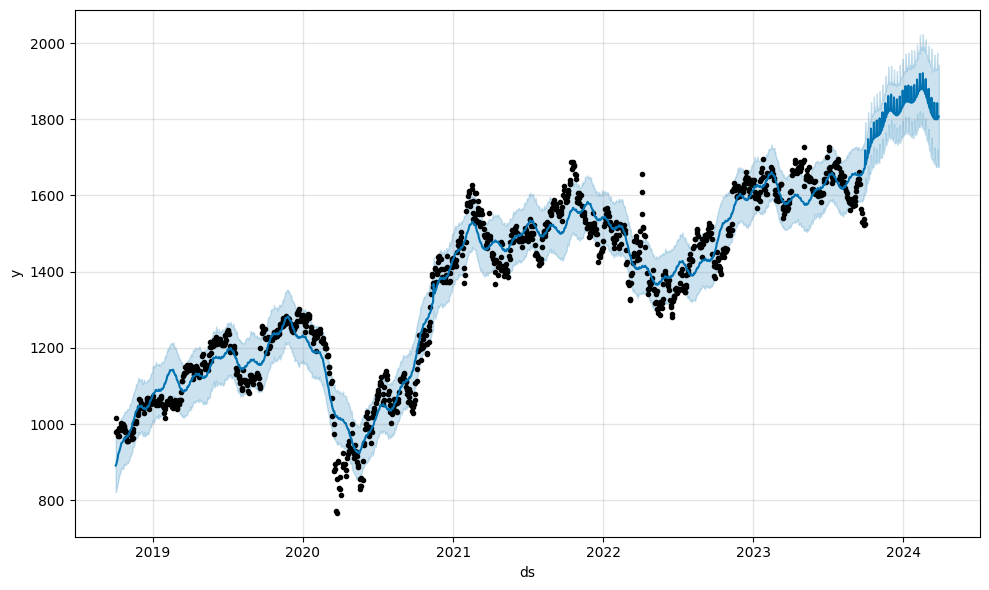

In [30]:
model.plot(prediction)
plt.show()

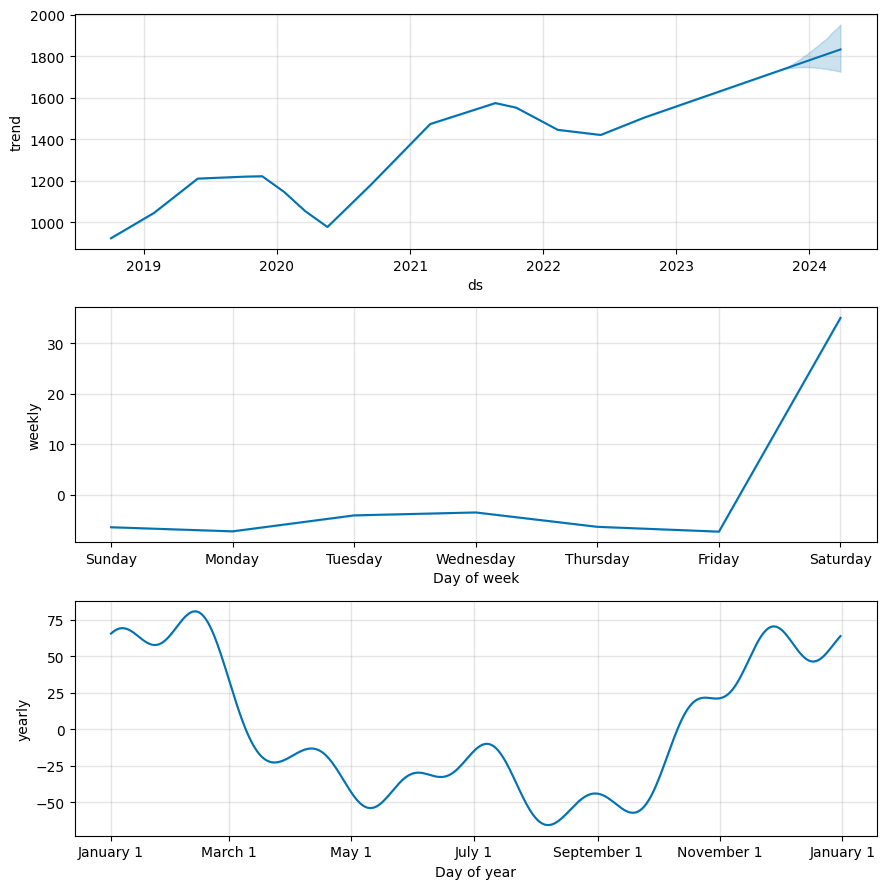

In [31]:
model.plot_components(prediction)
plt.show()

In [32]:
# cross validation :
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon='30 days', period = '15 days', initial='90 days')

INFO:prophet:Making 114 forecasts with cutoffs between 2019-01-08 00:00:00 and 2023-08-30 00:00:00


  0%|          | 0/114 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp22xpi23o/qjw7u_v6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp22xpi23o/99hn2sqf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81170', 'data', 'file=/tmp/tmp22xpi23o/qjw7u_v6.json', 'init=/tmp/tmp22xpi23o/99hn2sqf.json', 'output', 'file=/tmp/tmp22xpi23o/prophet_modelhhq9zzpj/prophet_model-20231003164802.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:48:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp22xpi23o/f03ighkh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp22xpi23o/zr59omvh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [33]:
from prophet.diagnostics import performance_metrics

In [34]:
df_performance = performance_metrics(df_cv)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,3.706972e+03,60.884905,47.032989,0.035844,0.029414,0.035704,0.548674
1,4 days,3.804243e+03,61.678547,47.536158,0.036071,0.028243,0.036137,0.547372
2,5 days,4.451450e+03,66.719190,49.869838,0.038449,0.025031,0.038375,0.537290
3,6 days,6.050277e+03,77.783526,55.889691,0.044153,0.027961,0.043748,0.496004
4,7 days,9.119938e+03,95.498369,66.945503,0.053943,0.034971,0.053495,0.441331
5,8 days,1.152337e+04,107.346982,77.080513,0.061591,0.040615,0.062222,0.409513
6,9 days,1.374555e+04,117.241432,82.991604,0.066026,0.040675,0.068162,0.413853
7,10 days,1.569674e+04,125.286621,84.360786,0.066784,0.039427,0.071161,0.427706
8,11 days,2.689174e+04,163.987010,89.791944,0.072458,0.039095,0.076871,0.434747
9,12 days,4.615956e+04,214.847753,99.343612,0.081898,0.038603,0.086451,0.441896


In [35]:
from prophet.plot import plot_cross_validation_metric

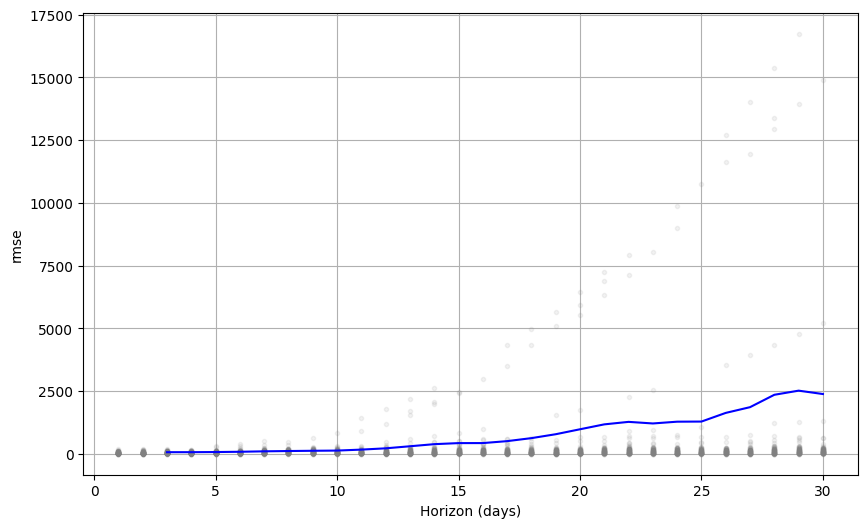

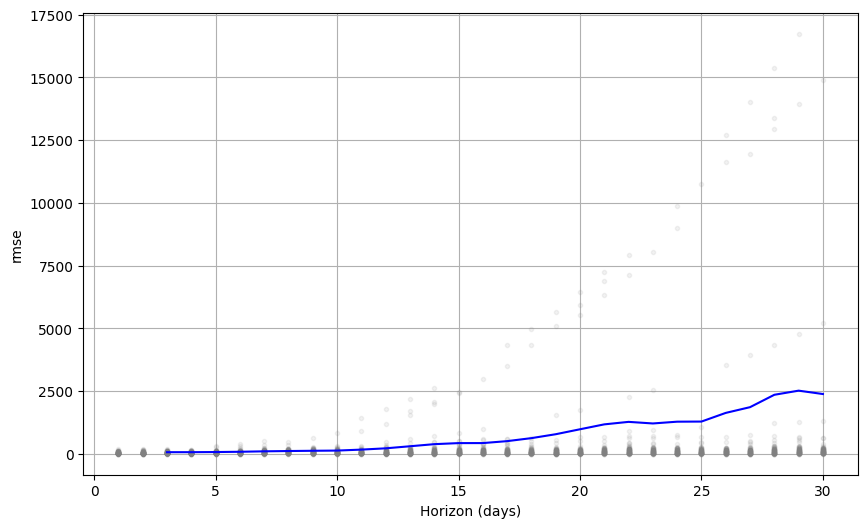

In [39]:
plot_cross_validation_metric(df_cv, metric='rmse')

In [ ]:
# ICICI and whatever you want